<a href="https://colab.research.google.com/github/xanasa14/Crypto/blob/main/Bitcoin_predictor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Sentiment Analisys 

In [14]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [15]:
tickers = ['COIN']
news_tables = {}

for ticker in tickers:
  url = finwiz_url + ticker
  req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
  response = urlopen(req)    
  # Read the contents of the file into 'html'
  html = BeautifulSoup(response)
  # Find 'news-table' in the Soup and load it into 'news_table'
  news_table = html.find(id='news-table')
  # Add the table to our dictionary
  news_tables[ticker] = news_table


In [16]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['COIN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

ARK Invest Stocks To Buy And Watch: 6 Stocks That Cathie Wood's ARK ETFs Own; Coinbase, Square, Tesla Race Higher
Jun-14-21 04:44PM  
Is Coinbase Stock A Buy Right Now As Bitcoin Surges Above $41,000?
04:42PM  
This Small 401(k) Provider and Coinbase Will Offer Cryptocurrencies in Retirement Plans. What to Know.
04:37PM  
What you need to know to start investing in cryptocurrency right now
11:05AM  


In [17]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['COIN',
  'Jun-14-21',
  '04:44PM',
  "ARK Invest Stocks To Buy And Watch: 6 Stocks That Cathie Wood's ARK ETFs Own; Coinbase, Square, Tesla Race Higher"],
 ['COIN',
  'Jun-14-21',
  '04:42PM',
  'Is Coinbase Stock A Buy Right Now As Bitcoin Surges Above $41,000?'],
 ['COIN',
  'Jun-14-21',
  '04:37PM',
  'This Small 401(k) Provider and Coinbase Will Offer Cryptocurrencies in Retirement Plans. What to Know.'],
 ['COIN',
  'Jun-14-21',
  '11:05AM',
  'What you need to know to start investing in cryptocurrency right now'],
 ['COIN',
  'Jun-12-21',
  '08:32AM',
  '7 Reasons Coinbase Is Americans Favorite Crypto Exchange'],
 ['COIN',
  'Jun-11-21',
  '05:00PM',
  "'Bitcoin is bad for crime,' says crypto asset manager"],
 ['COIN',
  'Jun-11-21',
  '12:24PM',
  'AMP Price Predictions: How High Will Amp Go in 2021? 2025?'],
 ['COIN',
  'Jun-11-21',
  '12:23PM',
  'AMP Crypto: 9 Things to Know About Amp Coin as It Starts Trading on Coinbase'],
 ['COIN',
  'Jun-10-21',
  '05:20PM',
  'Crypto 

In [22]:
import nltk
nltk.download('vader_lexicon')

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head(30)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ticker,date,time,headline,neg,neu,pos,compound
0,COIN,2021-06-14,04:44PM,ARK Invest Stocks To Buy And Watch: 6 Stocks T...,0.000,1.000,0.000,0.0000
1,COIN,2021-06-14,04:42PM,Is Coinbase Stock A Buy Right Now As Bitcoin S...,0.000,1.000,0.000,0.0000
2,COIN,2021-06-14,04:37PM,This Small 401(k) Provider and Coinbase Will O...,0.000,1.000,0.000,0.0000
3,COIN,2021-06-14,11:05AM,What you need to know to start investing in cr...,0.000,1.000,0.000,0.0000
4,COIN,2021-06-12,08:32AM,7 Reasons Coinbase Is Americans Favorite Crypt...,0.000,0.667,0.333,0.4588
5,COIN,2021-06-11,05:00PM,"'Bitcoin is bad for crime,' says crypto asset ...",0.269,0.538,0.192,-0.2500
6,COIN,2021-06-11,12:24PM,AMP Price Predictions: How High Will Amp Go in...,0.000,1.000,0.000,0.0000
7,COIN,2021-06-11,12:23PM,AMP Crypto: 9 Things to Know About Amp Coin as...,0.000,1.000,0.000,0.0000
8,COIN,2021-06-10,05:20PM,Crypto exchange Kraken rethinks how it will go...,0.000,1.000,0.000,0.0000
9,COIN,2021-06-10,03:38PM,Coinbase teams Up With 401(k) provider to offe...,0.000,1.000,0.000,0.0000


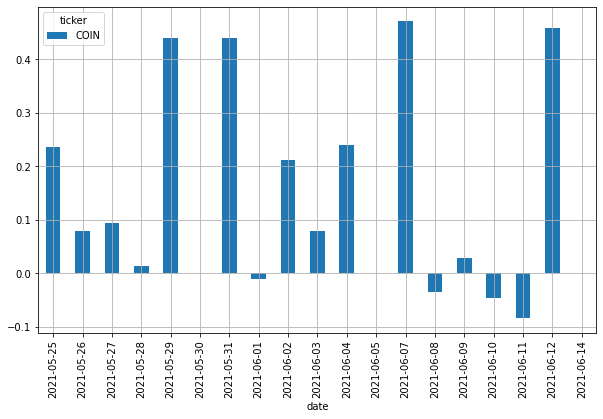

In [19]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

We should expect an increment of BitCoin's price in the following 2 days. As of right now, its price is 40,202.80 United States Dollar. 6/14/21 4:11